# load libraries

In [23]:
import pickle
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math , time , random , datetime
# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl
import missingno
#Import models from scikit learn module:
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier , Pool,cv
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv("pfa.csv")#header=0 , which means the first row of the CSV file will be treated as column names

In [25]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [27]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [28]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.tail()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# Explore data

In [29]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


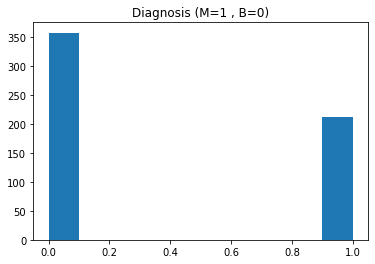

In [31]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [32]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]


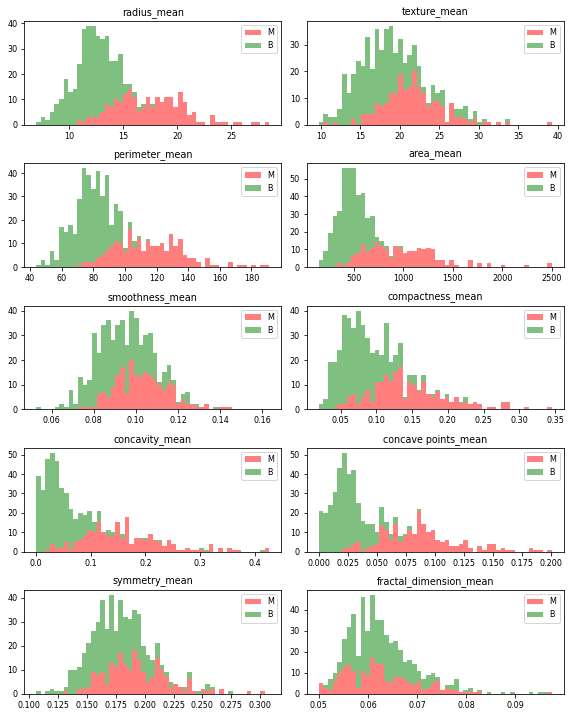

In [33]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True,  label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()


# plot graphics of missing data


<AxesSubplot:>

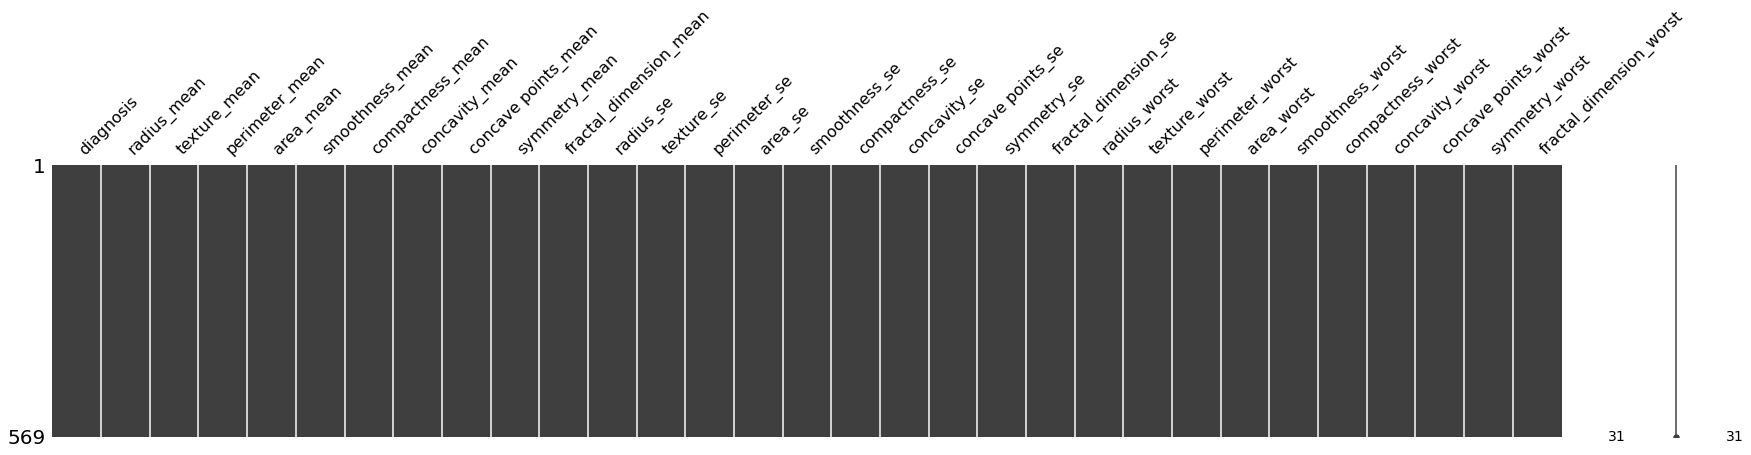

In [34]:
missingno.matrix(df,figsize=(30,5))

# creating a training set


In [35]:

x_train=df.drop('diagnosis',axis=1)
y_train=df.diagnosis
                                   

# model classification


In [36]:

def fit_ml_algo(algo,x_train,y_train,cv):
  #One Pass
  model=algo.fit(x_train,y_train)
  acc=round(model.score(x_train,y_train)*100,2)
  #Cross Validation
  train_pred=sklearn.model_selection.cross_val_predict(algo,x_train,y_train,cv=cv )
  #Cross Validation accuarcy metric
  acc_cv=round(metrics.accuracy_score(y_train,train_pred)*100,2)
  return train_pred ,acc, acc_cv
     

# Logistic Regression model

In [37]:
#Logistic Regression
start_time=time.time()
train_pred_log,acc_log,acc_cv_log=fit_ml_algo(LogisticRegression(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_log)
print('Accuracy for cross validation(percent)',acc_cv_log)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 94.73
Accuracy for cross validation(percent) 94.2
Runing Time 0:00:00.648850


# K_Nearst neighbors 

In [38]:
start_time=time.time()
train_pred_knn,acc_knn,acc_cv_knn=fit_ml_algo(KNeighborsClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_log)
print('Accuracy for cross validation(percent)',acc_cv_log)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 94.73
Accuracy for cross validation(percent) 94.2
Runing Time 0:00:00.167977


# Linear support vector machines

In [39]:

start_time=time.time()
train_pred_svc,acc_svc,acc_cv_svc=fit_ml_algo(LinearSVC(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_svc)
print('Accuracy for cross validation(percent)',acc_cv_svc)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 93.15
Accuracy for cross validation(percent) 91.92
Runing Time 0:00:00.772278


# Decision Tree Classifier

In [40]:
start_time=time.time()
train_pred_dt,acc_dt,acc_cv_dt=fit_ml_algo(DecisionTreeClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_dt)
print('Accuracy for cross validation(percent)',acc_cv_dt)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 100.0
Accuracy for cross validation(percent) 91.39
Runing Time 0:00:00.235054


# Gradient Boosting Trees

In [41]:

start_time=time.time()
train_pred_gbt,acc_gbt,acc_cv_gbt=fit_ml_algo(GradientBoostingClassifier(),x_train,y_train,10)
log_time=time.time()-start_time
print('Accuracy (percent)',acc_dt)
print('Accuracy for cross validation(percent)',acc_cv_gbt)
print('Runing Time',datetime.timedelta(seconds=log_time))

Accuracy (percent) 100.0
Accuracy for cross validation(percent) 95.78
Runing Time 0:00:09.634510


In [42]:
models=pd.DataFrame({
    'Model':['KNN','Logistic Regression ', 'Linear svc ','Decision Tree '],
    'Score':[acc_knn,acc_log, acc_svc,acc_dt]
})
models.sort_values(by='Score',ascending=False)
     

,Model,Score
3,Decision Tree,100.00
0,KNN,94.73
1,Logistic Regression,94.73
2,Linear svc,93.15


In [43]:
models=pd.DataFrame({
    'Model':['KNN','Logistic Regression ', 'Linear svc ','Decision Tree '],
    'Score':[acc_cv_knn,acc_cv_log, acc_cv_svc,acc_cv_dt]
})
models.sort_values(by='Score',ascending=False)
     

,Model,Score
1,Logistic Regression,94.20
0,KNN,92.97
2,Linear svc,91.92
3,Decision Tree,91.39


# Feature selection

In [44]:

from sklearn.feature_selection import SelectKBest, f_regression

k = 5  # number of top features to select
selector = SelectKBest(f_regression, k=k)
selector.fit(x_train, y_train)

# Get the indices of the selected features
top_k_indices = selector.get_support(indices=True)

# Get the names of the top k features
top_k_features = list(x_train.columns[top_k_indices])



In [45]:
print(top_k_features)

['perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


In [46]:
selector=LogisticRegression()
selector.fit(x_train,y_train)
with open('model1.pkl', 'wb') as f:
    pickle.dump(selector, f)

In [ ]:
selector=LogisticRegression()
selector.fit(x_train,y_train)